In [81]:
import pandas as pd

In [82]:
df = pd.read_csv("taxi_trip_pricing.csv")
# print(df.head())
# print(df.shape)
# print(df.columns.tolist())
# df.info()
df.head()
df.shape
df.isnull().sum()


Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [83]:
df["Trip_Distance_km"] = df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median())
df["Trip_Distance_km"].isnull().sum()
# df["Trip_Distance_km"].sort_values(ascending=True).head(10)


0

In [84]:
import numpy as np
df['Trip_Distance_km_log'] = np.log1p(df['Trip_Distance_km'])

In [85]:
import numpy as np

def suggest_imputation(df, column):
    """
    Takes a dataframe and a column name,
    calculates skewness and suggests mean or median for missing value handling.
    """
    if column not in df.columns:
        return f"Column '{column}' not found in DataFrame."
    
    if not np.issubdtype(df[column].dtype, np.number):
        return f"Column '{column}' is not numeric. Cannot calculate skewness."

    skew = df[column].skew()

    if -0.5 <= skew <= 0.5:
        return f"{column}: skew = {skew:.2f} → Nearly symmetric → Suggest **MEAN**"
    elif skew > 0.5:
        return f"{column}: skew = {skew:.2f} → Right skew → Suggest **MEDIAN**"
    else:  # skew < -0.5
        return f"{column}: skew = {skew:.2f} → Left skew → Suggest **MEDIAN**"

suggest_imputation(df, "Trip_Price")

'Trip_Price: skew = 3.73 → Right skew → Suggest **MEDIAN**'

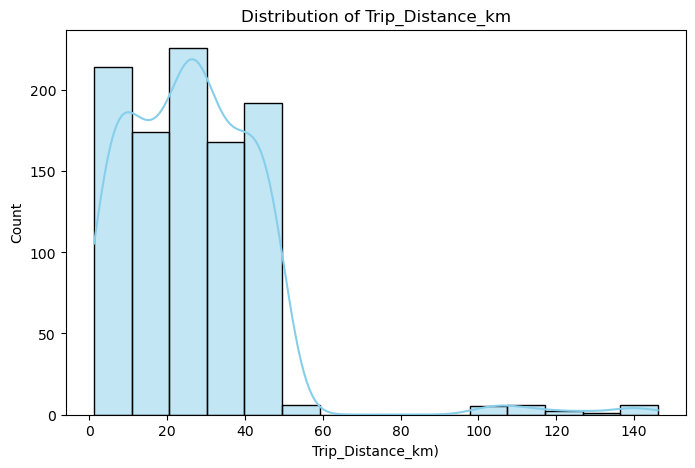

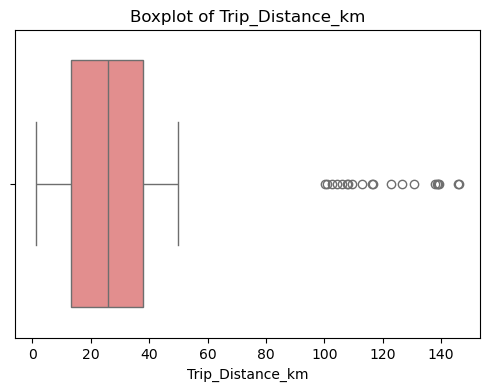

In [86]:
# df['Trip_Distance_km'].unique().tolist()

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["Trip_Distance_km"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Trip_Distance_km")
plt.xlabel("Trip_Distance_km)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Trip_Distance_km"], color="lightcoral")
plt.title("Boxplot of Trip_Distance_km")
plt.xlabel("Trip_Distance_km")
plt.show()


In [92]:
# df["Time_of_Day"].unique().tolist()
# df["Time_of_Day"] = df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0])

# # df.groupby("Time_of_Day")["Trip_Price"].mean() # Check Time of the day, how effecting on trip price as average
# dummies = pd.get_dummies(df["Time_of_Day"], prefix="Time", drop_first=True)
# df = pd.concat([df, dummies], axis=1) # Keep the orignal column and other too

# df["Time_of_Day"].unique().tolist()
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Time_Evening,Time_Morning,Time_Night
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,3.013081,False,True,False
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN,3.883418,False,False,False
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,3.634159,True,False,False
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,3.444576,True,False,False
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,3.289521,True,False,False


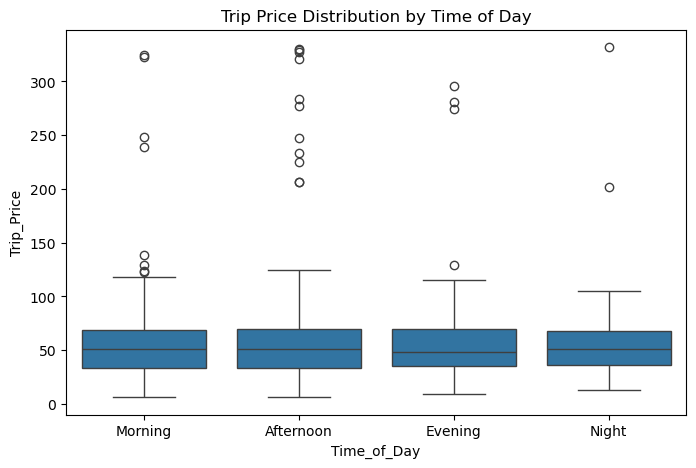

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Time_of_Day", y="Trip_Price", data=df)
plt.title("Trip Price Distribution by Time of Day")

plt.show()


In [97]:
df.info()
# df["Day_of_Week"] = df["Day_of_Week"].fillna(df["Day_of_Week"].mode()[0])

# df = pd.get_dummies(df, columns=["Day_of_Week"], prefix="Day", drop_first=True)

df.isnull().sum()
# df["Day_of_Week"].isnull().sum()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Passenger_Count        950 non-null    float64
 3   Traffic_Conditions     950 non-null    object 
 4   Weather                950 non-null    object 
 5   Base_Fare              950 non-null    float64
 6   Per_Km_Rate            950 non-null    float64
 7   Per_Minute_Rate        950 non-null    float64
 8   Trip_Duration_Minutes  950 non-null    float64
 9   Trip_Price             951 non-null    float64
 10  Trip_Distance_km_log   1000 non-null   float64
 11  Time_Evening           1000 non-null   bool   
 12  Time_Morning           1000 non-null   bool   
 13  Time_Night             1000 non-null   bool   
 14  Day_Weekend            1000 non-null   bool   
dtypes: bo

,Trip_Distance_km,Time_of_Day,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Time_Evening,Time_Morning,Time_Night,Day_Weekend
0,19.35,Morning,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,3.013081,False,True,False,False
1,47.59,Afternoon,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN,3.883418,False,False,False,False
2,36.87,Evening,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,3.634159,True,False,False,True
3,30.33,Evening,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,3.444576,True,False,False,False
4,25.83,Evening,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,3.289521,True,False,False,False


In [98]:
df.groupby("Passenger_Count")["Trip_Price"].mean() # Check Time of the day, how effecting on trip price as average
df["Passenger_Count"] = df["Passenger_Count"].fillna(df["Passenger_Count"].mean())
df["Passenger_Count"] = df["Passenger_Count"].astype(int)


In [99]:
# Step 1: Fill missing with mode
df["Traffic_Conditions"] = df["Traffic_Conditions"].fillna(df["Traffic_Conditions"].mode()[0])

# # Step 2: Map values
mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Traffic_Conditions_mapped"] = df["Traffic_Conditions"].map(mapping)

print(df["Traffic_Conditions_mapped"].unique())


[1 3 2]


In [101]:

# df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])
# df = pd.get_dummies(df, columns=["Weather"], prefix="Weather", drop_first=True)
# df["Weather"].unique().tolist()
df.head()

,Trip_Distance_km,Time_of_Day,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Time_Evening,Time_Morning,Time_Night,Day_Weekend,Traffic_Conditions_mapped,Weather_Rain,Weather_Snow
0,19.35,Morning,3,Low,3.56,0.80,0.32,53.82,36.2624,3.013081,False,True,False,False,1,False,False
1,47.59,Afternoon,1,High,NaN,0.62,0.43,40.57,NaN,3.883418,False,False,False,False,3,False,False
2,36.87,Evening,1,High,2.70,1.21,0.15,37.27,52.9032,3.634159,True,False,False,True,3,False,False
3,30.33,Evening,4,Low,3.48,0.51,0.15,116.81,36.4698,3.444576,True,False,False,False,1,False,False
4,25.83,Evening,3,High,2.93,0.63,0.32,22.64,15.6180,3.289521,True,False,False,False,3,False,False


<Axes: >

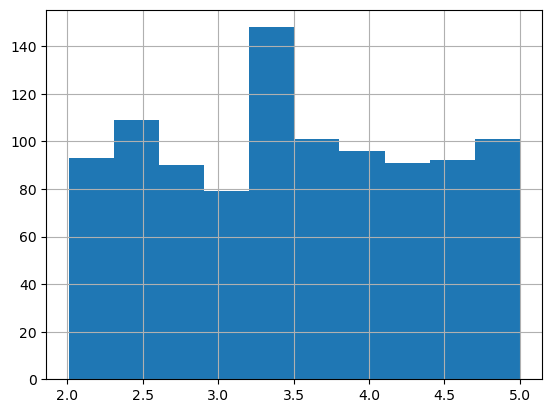

In [102]:
df["Base_Fare"] = df["Base_Fare"].fillna(df["Base_Fare"].mean())
df["Base_Fare"].hist()


<Axes: >

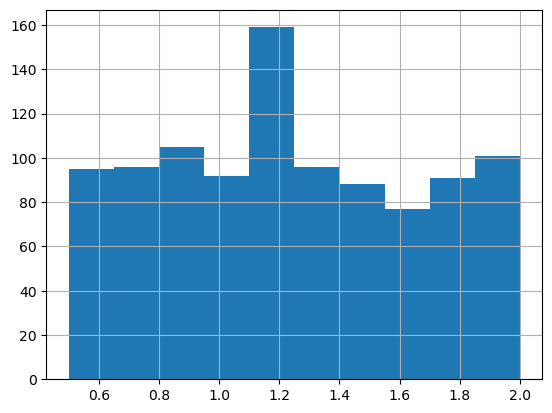

In [103]:
df["Per_Km_Rate"] = df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].mean())
df["Per_Km_Rate"].hist()

In [104]:
df["Per_Minute_Rate"] = df["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].mean())
df["Trip_Duration_Minutes"] = df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].mean())



In [63]:
# def detect_outliers_iqr(df):
#     numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
#     for col in numeric_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR

#         outliers = df[(df[col] < lower) | (df[col] > upper)]
#         print(f"{col}: {len(outliers)} outliers found")

# # Example usage
# detect_outliers_iqr(df)


In [105]:
# 1. Drop missing target values
df = df.dropna(subset=["Trip_Price"])

# 2. Create log-transformed target (unscaled)
df["Trip_Price_log"] = np.log1p(df["Trip_Price"])

# 3. (Optional) Check skewness improvement
print("Skew before:", df["Trip_Price"].skew())
print("Skew after log1p:", df["Trip_Price_log"].skew())

# 4. Convert bools to ints
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


Skew before: 3.732560575003673
Skew after log1p: 0.00037947007027506075


C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_1184\568038127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Trip_Price_log"] = np.log1p(df["Trip_Price"])


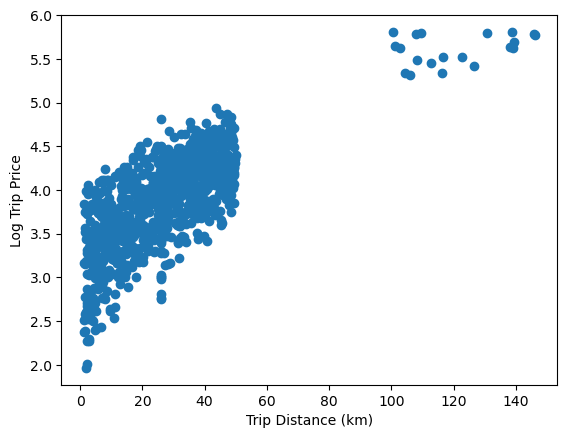

In [106]:
import matplotlib.pyplot as plt

plt.scatter(df["Trip_Distance_km"], df["Trip_Price_log"])
plt.xlabel("Trip Distance (km)")
plt.ylabel("Log Trip Price")
plt.show()


In [107]:
# features = [
#     'Trip_Distance_km_log', 'Passenger_Count', 'Base_Fare',
#     'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
#     'Traffic_Conditions_mapped', 'Time_Evening', 'Time_Morning',
#     'Time_Night', 'Weather_Rain', 'Weather_Snow'
# ]
# target = 'Trip_Price_log'  # if you want to predict log(price)

# Columns to drop (redundant or target column)
drop_cols = [
    # 'Trip_Price',          # raw target (using Trip_Price_log instead)
    'Trip_Distance_km',    # replaced with log version
    'Time_of_Day',         # replaced with dummy vars
    'Day_of_Week',         # only keep if you encode it
    'Traffic_Conditions',  # replaced with mapped version
    'Weather'              # replaced with dummy vars (Rain/Snow)
]

# Drop in place
df = df.drop(columns=drop_cols, errors='ignore')

print("Remaining columns:")
print(df.columns.tolist())



Remaining columns:
['Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Trip_Distance_km_log', 'Time_Evening', 'Time_Morning', 'Time_Night', 'Day_Weekend', 'Traffic_Conditions_mapped', 'Weather_Rain', 'Weather_Snow', 'Trip_Price_log']


In [108]:
# Scaling
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.describe()

,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Time_Evening,Time_Morning,Time_Night,Day_Weekend,Traffic_Conditions_mapped,Weather_Rain,Weather_Snow,Trip_Price_log
count,951.000000,9.510000e+02,9.510000e+02,951.000000,9.510000e+02,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,2.455310,2.885879e-16,-2.801825e-18,0.293852,1.867883e-17,56.874773,3.085902,0.207150,0.278654,0.093586,0.297581,1.735016,0.227129,0.057834,3.895528
std,1.077937,1.000526e+00,1.000526e+00,0.112389,1.000526e+00,40.469791,0.776210,0.405477,0.448573,0.291405,0.457435,0.746376,0.419197,0.233552,0.560493
min,1.000000,-1.758175e+00,-1.739707e+00,0.100000,-1.809988e+00,6.126900,0.802002,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.963876
25%,2.000000,-8.657142e-01,-8.580470e-01,0.200000,-8.059502e-01,33.742650,2.648300,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.547968
50%,2.000000,6.639283e-03,7.685860e-03,0.292916,2.233828e-03,50.074500,3.289521,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.933285
75%,3.000000,7.950908e-01,8.337879e-01,0.390000,8.195814e-01,69.099350,3.659193,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,4.249913
max,4.000000,1.776207e+00,1.834592e+00,0.500000,1.833932e+00,332.043689,4.990889,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.808274


In [109]:

from sklearn.model_selection import train_test_split

# Features: drop BOTH Trip_Price and Trip_Price_log (target shouldn't be in X)
X = df.drop(["Trip_Price", "Trip_Price_log"], axis=1)

# Target: use log-transformed price
y = df["Trip_Price_log"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X.columns)

Index(['Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate',
       'Trip_Duration_Minutes', 'Trip_Distance_km_log', 'Time_Evening',
       'Time_Morning', 'Time_Night', 'Day_Weekend',
       'Traffic_Conditions_mapped', 'Weather_Rain', 'Weather_Snow'],
      dtype='object')


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Create polynomial features
poly = PolynomialFeatures(degree=2)   # degree=2 (quadratic), try higher if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Initialize model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)


LinearRegression()

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
linear_MSE = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R2:", r2_poly)
print("Linear Regression MSE:", linear_MSE)
print("Linear Regression R2:", r2_linear)

Polynomial Regression MSE: 0.02047600367981129
Polynomial Regression R2: 0.9323213341687757
Linear Regression MSE: 0.05180503961496281
Linear Regression R2: 0.8287704954882721


In [112]:
if r2_poly > r2_linear:
    print("Polynomial Regression is better")
else:
    print("Linear Regression is better")


Polynomial Regression is better


In [113]:
# Suppose you trained already:

# New taxi ride data (same features as X_train)
new_data = pd.DataFrame({
    "Passenger_Count": [3],           # number of passengers
    "Base_Fare": [3.56],              # fixed base fare
    "Per_Km_Rate": [0.8],             # rate per km
    "Per_Minute_Rate": [0.32],        # rate per minute
    "Trip_Duration_Minutes": [53.82], # duration of trip
    "Trip_Distance_km_log": [2.996],  # log of trip distance in km
    "Time_Evening": [0],              # binary time features
    "Time_Morning": [1],
    "Time_Night": [0],
    "Day_Weekend": [0],               # 0=weekday, 1=weekend
    "Traffic_Conditions_mapped": [0], # mapped traffic condition
    "Weather_Rain": [0],              # binary weather features
    "Weather_Snow": [0]
})
# Predict (this will give you log-price if your target was Trip_Price_log)

# Suppose these are the features to scale (same as training)
cols_to_scale = ['Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate']

#  Fit the scaler on training data
new_data[cols_to_scale] = scaler.transform(new_data[cols_to_scale])


new_data_poly = poly.transform(new_data) # Polynomial
y_pred_new = poly_model.predict(new_data_poly)

y_pred = model.predict(new_data)   # Linear
real_price_linear = np.expm1(y_pred)

# print("Predicted log-price:", y_pred_new)

# Convert log-price back to real price
real_price_poly = np.expm1(y_pred_new)   # inverse of log1p
print("Predicted real price (Polynomial):", real_price_poly)
print("Predicted real price (Linear):", real_price_linear)



Predicted real price (Polynomial): [31.92547468]
Predicted real price (Linear): [36.0961389]


In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import json

# -----------------------------
# Linear model metrics
# -----------------------------
y_pred = model.predict(X_test)

linear_metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
    "RMSE": root_mean_squared_error(y_test, y_pred)

}

print("Linear Model Metrics:", linear_metrics)

# Save to JSON
with open("taxi_linear_metrics.json", "w") as f:
    json.dump(linear_metrics, f)

# -----------------------------
# Polynomial model metrics
# -----------------------------
y_pred_poly = poly_model.predict(X_test_poly)


poly_metrics = {
    "MSE": mean_squared_error(y_test, y_pred_poly),
    "MAE": mean_absolute_error(y_test, y_pred_poly),
    "R2": r2_score(y_test, y_pred_poly),
    "RMSE": root_mean_squared_error(y_test, y_pred_poly)

}

print("Polynomial Model Metrics:", poly_metrics)

# Save to JSON
with open("taxi_poly_metrics.json", "w") as f:
    json.dump(poly_metrics, f)


Linear Model Metrics: {'MSE': 0.05180503961496281, 'MAE': 0.14763727886042755, 'R2': 0.8287704954882721, 'RMSE': 0.2276072046640062}
Polynomial Model Metrics: {'MSE': 0.02047600367981129, 'MAE': 0.08972166783461416, 'R2': 0.9323213341687757, 'RMSE': 0.1430943873106534}


In [115]:
import joblib

# Save models and transformer
joblib.dump(model, "linear_model.pkl")
joblib.dump(poly_model, "poly_model.pkl")
joblib.dump(poly, "poly_transformer.pkl")
joblib.dump(scaler, "taxi_scaler.pkl")



['taxi_scaler.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# -----------------------------
linear_model = joblib.load("linear_model.pkl")
poly_model = joblib.load("poly_model.pkl")
poly = joblib.load("poly_transformer.pkl")
scaler = joblib.load("taxi_scaler.pkl")


In [116]:
# Suppose you trained already:

# New taxi ride data (same features as X_train)
new_data = pd.DataFrame({
    "Passenger_Count": [3],           # number of passengers
    "Base_Fare": [3.56],              # fixed base fare
    "Per_Km_Rate": [0.8],             # rate per km
    "Per_Minute_Rate": [0.32],        # rate per minute
    "Trip_Duration_Minutes": [53.82], # duration of trip
    "Trip_Distance_km_log": [2.996],  # log of trip distance in km
    "Time_Evening": [0],              # binary time features
    "Time_Morning": [1],
    "Time_Night": [0],
    "Day_Weekend": [0],               # 0=weekday, 1=weekend
    "Traffic_Conditions_mapped": [0], # mapped traffic condition
    "Weather_Rain": [0],              # binary weather features
    "Weather_Snow": [0]
})
# Predict (this will give you log-price if your target was Trip_Price_log)

# Suppose these are the features to scale (same as training)
cols_to_scale = ['Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate']

#  Fit the scaler on training data
new_data[cols_to_scale] = scaler.transform(new_data[cols_to_scale])


new_data_poly = poly.transform(new_data) # Polynomial
y_pred_new = poly_model.predict(new_data_poly)

y_pred = model.predict(new_data)   # Linear
real_price_linear = np.expm1(y_pred)

# print("Predicted log-price:", y_pred_new)

# Convert log-price back to real price
real_price_poly = np.expm1(y_pred_new)   # inverse of log1p
print("Predicted real price (Polynomial):", real_price_poly)
print("Predicted real price (Linear):", real_price_linear)

Predicted real price (Polynomial): [31.92547468]
Predicted real price (Linear): [36.0961389]
